# 데이터 구성 및 문제 정의

## 데이터 정의

##핀성형기 장비 데이터##
- 설비이름_START: 설비이름/가동 (단위 : ON/OFF, ON=1, OFF=0) (Type: int64)
- 설비이름_STOP: 설비이름/정지 (단위 : ON/OFF, ON=1, OFF=0) (Type: int64)
- 설비이름_CNT: 설비이름/생산수량 (단위: EA) (Type: float64)
- 설비이름_VOLT_N상: 설비이름/N상 전압 (단위: V) (Type: float64)
- 설비이름_VOLT_AVG: 설비이름/평균 전압 (단위 : V) (Type: float64)
- 설비이름_CURR_N상: 설비이름/N상 전류 (단위 : A) (Type: float64)
- 설비이름_CURR_AVG: 설비이름/평균 전류 (단위 : A) (Type: float64)
- 설비이름_KW: 설비이름/유효전력 (단위 : KW) (Type: float64)
- 설비이름_KVAR: 설비이름/무효전력 (단위 : KVAR) (Type: float64)
- 설비이름_HZ: 설비이름/주파수 (단위 : HZ) (Type: float64)
- 설비이름_PWR_FACTOR: 설비이름/역률 (단위 : %) (Type: float64)
- 설비이름_KWH: 설비이름/유효전력량 (단위 : KWH) (Type: float64)
- 설비이름_KVARH: 설비이름/무효전력량 (단위 : KVARH) (Type: float64)  

=> 본 데이터는 핀성형기 장비 실제 데이터를 기반으로 만들어진 샘플용 데이터

## 분석 목적
: 핀성형기 가동정보 데이터를 바탕으로 설치된 센서 데이터를 확인하여 핀성형기 START/STOP의 구분점을 찾는 것을 목표로 한다.

# 라이브러리 불러오기

## 라이브러리

In [1]:
## 데이터 전처리
import numpy as np
import pandas as pd
import sys
import pickle
import itertools

## 데이터 시각화
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

## 모델링
import sklearn
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import joblib

import warnings
np.set_printoptions(threshold=sys.maxsize)
warnings.filterwarnings(action='ignore')

## 개발환경 (Version)

In [2]:
print('Python 버전: 3.11.5')    # 터미널에서 확인
print('matplotlib 버전:', matplotlib.__version__)
print('seaborn 버전:', sns.__version__)
print('scikit-learn 버전:', sklearn.__version__)

Python 버전: 3.11.5
matplotlib 버전: 3.8.2
seaborn 버전: 0.13.2
scikit-learn 버전: 1.2.2


# 데이터셋 불러오기
: 플라스틱의 사출 성형에 사용되는 기계(핀성형기)의 데이터

##원본 데이터 설명##
- MAKING1_START: 가동 (단위 : ON/OFF, ON=1, OFF=0) (Type: int64)
- MAKING1_STOP: 정지 (단위 : ON/OFF, ON=1, OFF=0) (Type: int64)
- MAKING1_CNT: 생산수량 (단위: EA) (Type: float64)
- MAKING1_VOLT_N상: N상 전압 (단위: V) (Type: float64)
- MAKING1_VOLT_AVG: 평균 전압 (단위 : V) (Type: float64)
- MAKING1_CURR_N상: N상 전류 (단위 : A) (Type: float64)
- MAKING1_CURR_AVG: 평균 전류 (단위 : A) (Type: float64)
- MAKING1_KW: 유효전력 (단위 : KW) (Type: float64)
- MAKING1_KVAR: 무효전력 (단위 : KVAR) (Type: float64)
- MAKING1_HZ: 주파수 (단위 : HZ) (Type: float64)
- MAKING1_PWR_FACTOR: 역률 (단위 : %) (Type: float64)
- MAKING1_KWH: 유효전력량 (단위 : KWH) (Type: float64)
- MAKING1_KVARH: 무효전력량 (단위 : KVARH) (Type: float64)  

In [3]:
data = pd.read_csv('./datasets/pre_project_1/핀성형기_가동정보_데이터.csv', index_col=0)
data.head()

,MAKING1_START,MAKING1_STOP,MAKING1_CNT,MAKING1_VOLT_A,MAKING1_VOLT_B,MAKING1_VOLT_C,MAKING1_VOLT_AVG,MAKING1_CURR_A,MAKING1_CURR_B,MAKING1_CURR_C,MAKING1_CURR_AVG,MAKING1_KW,MAKING1_KVAR,MAKING1_HZ,MAKING1_PWR_FACTOR,MAKING1_KWH,MAKING1_KVARH
0,1,0,19978.679427,118.034768,119.514007,118.025641,118.292214,0.770411,0.155281,0.735165,0.545518,0.175901,0.043439,32.991709,34.695346,899.848871,428.177401
1,1,0,19978.679427,118.034768,119.514007,118.025641,118.292214,0.770411,0.155281,0.735165,0.545518,0.175901,0.043439,32.991709,34.695346,899.848871,428.177401
2,1,0,19978.679427,118.082551,119.533032,118.058522,118.654133,0.759469,0.142909,0.742588,0.545518,0.175901,0.043439,32.991709,34.441750,899.848871,428.177401
3,1,0,19978.679427,117.910060,119.353007,117.878608,118.513753,0.756335,0.151377,0.738135,0.547662,0.175901,0.043439,32.991709,34.712777,899.848871,428.177401
4,1,0,19978.679427,117.858483,119.786958,117.258748,118.507594,0.767937,0.165618,0.739179,0.554151,0.175901,0.043439,32.991709,34.454947,899.848871,428.177401


In [4]:
## 각 컬럼별 데이터 분포 확인
data.describe()

,MAKING1_START,MAKING1_STOP,MAKING1_CNT,MAKING1_VOLT_A,MAKING1_VOLT_B,MAKING1_VOLT_C,MAKING1_VOLT_AVG,MAKING1_CURR_A,MAKING1_CURR_B,MAKING1_CURR_C,MAKING1_CURR_AVG,MAKING1_KW,MAKING1_KVAR,MAKING1_HZ,MAKING1_PWR_FACTOR,MAKING1_KWH,MAKING1_KVARH
count,158400.000000,158400.000000,158400.000000,158400.000000,158400.000000,158400.000000,158400.000000,158400.000000,158400.000000,158400.000000,158400.000000,158400.000000,158400.000000,158400.000000,158400.000000,158400.000000,158400.000000
mean,0.522418,0.427115,27598.551275,118.633787,119.913057,118.359518,118.962659,1.209694,0.829972,1.607035,1.212342,0.352885,0.168920,32.955868,34.132494,915.356262,435.934295
std,0.499499,0.494661,5918.951310,1.249954,1.169580,1.299195,1.234392,0.657308,0.833680,1.057567,0.842028,0.241113,0.137532,0.067333,5.028799,10.068855,5.027104
min,0.000000,0.000000,19978.679427,115.063150,116.570706,114.479417,115.487863,0.355046,0.003464,0.411792,0.281364,0.068953,0.027603,32.854244,21.765785,899.848871,428.177401
25%,0.000000,0.000000,21866.217596,117.614949,119.006085,117.369600,117.949815,0.711356,0.056636,0.740829,0.498285,0.153961,0.041460,32.883881,30.705439,905.773618,431.077922
50%,1.000000,0.000000,25756.902380,118.589469,119.921372,118.286962,118.936102,0.820229,0.158525,0.835075,0.588517,0.191297,0.051412,32.991709,34.633267,914.227703,435.463070
75%,1.000000,1.000000,33976.649286,119.657630,120.738549,119.396831,119.943394,1.883827,1.663827,2.731219,2.096348,0.606992,0.316665,32.991709,38.658723,925.486124,441.057872
max,1.000000,1.000000,37264.685514,122.616052,123.708133,122.422776,122.621771,5.241228,4.945732,6.191774,5.395519,1.161253,0.492676,33.127910,43.143863,932.070719,444.178325


- count: 데이터의 갯수
- mean: 각 컬럼별 데이터의 평균값
- std:각 컬럼별 데이터의 표준편차
- min:각 컬럼별 데이터의 최소값
- 25%, 50%, 75%: 각 컬럼별 데이터의 분위수의 값
- max:각 컬럼별 데이터의 최대값

# 데이터 전처리

## 변수 선언

In [5]:
## 가동정보 START(ON=1) 데이터 집합을 변수로 선언
start_on = data[data['MAKING1_START']==1]
start_on.head(3)

,MAKING1_START,MAKING1_STOP,MAKING1_CNT,MAKING1_VOLT_A,MAKING1_VOLT_B,MAKING1_VOLT_C,MAKING1_VOLT_AVG,MAKING1_CURR_A,MAKING1_CURR_B,MAKING1_CURR_C,MAKING1_CURR_AVG,MAKING1_KW,MAKING1_KVAR,MAKING1_HZ,MAKING1_PWR_FACTOR,MAKING1_KWH,MAKING1_KVARH
0,1,0,19978.679427,118.034768,119.514007,118.025641,118.292214,0.770411,0.155281,0.735165,0.545518,0.175901,0.043439,32.991709,34.695346,899.848871,428.177401
1,1,0,19978.679427,118.034768,119.514007,118.025641,118.292214,0.770411,0.155281,0.735165,0.545518,0.175901,0.043439,32.991709,34.695346,899.848871,428.177401
2,1,0,19978.679427,118.082551,119.533032,118.058522,118.654133,0.759469,0.142909,0.742588,0.545518,0.175901,0.043439,32.991709,34.441750,899.848871,428.177401


In [6]:
## 가동정보 START(OFF=0) 데이터 집합을 변수로 선언
start_off = data[data['MAKING1_START']==0]
start_off.head(3)

,MAKING1_START,MAKING1_STOP,MAKING1_CNT,MAKING1_VOLT_A,MAKING1_VOLT_B,MAKING1_VOLT_C,MAKING1_VOLT_AVG,MAKING1_CURR_A,MAKING1_CURR_B,MAKING1_CURR_C,MAKING1_CURR_AVG,MAKING1_KW,MAKING1_KVAR,MAKING1_HZ,MAKING1_PWR_FACTOR,MAKING1_KWH,MAKING1_KVARH
3600,0,1,20552.185307,120.733985,121.774324,120.274960,120.963937,1.850340,1.629186,2.695698,2.053349,0.606992,0.343114,32.991709,38.699440,901.44347,428.947152
3601,0,1,20552.185307,120.733985,121.774324,120.274960,120.963937,1.850340,1.629186,2.695698,2.053349,0.606992,0.343114,32.991709,38.699440,901.44347,428.947152
3602,0,1,20552.185307,120.740308,121.770145,120.278369,120.503868,1.884596,1.647551,2.720331,2.079138,0.606992,0.343114,32.867825,38.318991,901.44347,428.947152


In [7]:
## 가동정보 STOP(ON=1) 데이터 집합을 변수로 선언
stop_on = data[data['MAKING1_STOP']==1]
stop_on.head(3)

,MAKING1_START,MAKING1_STOP,MAKING1_CNT,MAKING1_VOLT_A,MAKING1_VOLT_B,MAKING1_VOLT_C,MAKING1_VOLT_AVG,MAKING1_CURR_A,MAKING1_CURR_B,MAKING1_CURR_C,MAKING1_CURR_AVG,MAKING1_KW,MAKING1_KVAR,MAKING1_HZ,MAKING1_PWR_FACTOR,MAKING1_KWH,MAKING1_KVARH
3600,0,1,20552.185307,120.733985,121.774324,120.274960,120.963937,1.850340,1.629186,2.695698,2.053349,0.606992,0.343114,32.991709,38.699440,901.44347,428.947152
3601,0,1,20552.185307,120.733985,121.774324,120.274960,120.963937,1.850340,1.629186,2.695698,2.053349,0.606992,0.343114,32.991709,38.699440,901.44347,428.947152
3602,0,1,20552.185307,120.740308,121.770145,120.278369,120.503868,1.884596,1.647551,2.720331,2.079138,0.606992,0.343114,32.867825,38.318991,901.44347,428.947152


In [8]:
## 가동정보 STOP(ON=0) 데이터 집합을 변수로 선언
stop_off = data[data['MAKING1_STOP']==0]
stop_off.head(3)

,MAKING1_START,MAKING1_STOP,MAKING1_CNT,MAKING1_VOLT_A,MAKING1_VOLT_B,MAKING1_VOLT_C,MAKING1_VOLT_AVG,MAKING1_CURR_A,MAKING1_CURR_B,MAKING1_CURR_C,MAKING1_CURR_AVG,MAKING1_KW,MAKING1_KVAR,MAKING1_HZ,MAKING1_PWR_FACTOR,MAKING1_KWH,MAKING1_KVARH
0,1,0,19978.679427,118.034768,119.514007,118.025641,118.292214,0.770411,0.155281,0.735165,0.545518,0.175901,0.043439,32.991709,34.695346,899.848871,428.177401
1,1,0,19978.679427,118.034768,119.514007,118.025641,118.292214,0.770411,0.155281,0.735165,0.545518,0.175901,0.043439,32.991709,34.695346,899.848871,428.177401
2,1,0,19978.679427,118.082551,119.533032,118.058522,118.654133,0.759469,0.142909,0.742588,0.545518,0.175901,0.043439,32.991709,34.441750,899.848871,428.177401


## 훈련용 데이터셋 만들기

### 종속변수 = START(ON/OFF) 데이터셋

In [41]:
X = np.array(data.iloc[:, 2:])
Y_start = np.array(data.iloc[:, 0])
Y_start = Y_start.reshape(-1, 1)
X.shape, Y_start.shape

((158400, 15), (158400, 1))

### 종속변수 = STOP(ON/OFF) 데이터셋

In [42]:
X = np.array(data.iloc[:, 2:])
Y_stop = np.array(data.iloc[:, 1])
Y_stop = Y_stop.reshape(-1, 1)
X.shape, Y_stop.shape

((158400, 15), (158400, 1))

# 모델링

## 결과 지표 (Confusion Matrix, 혼동행렬)
- precision: 모델이 이상이라 분류한 것 중 실제 이상인 비율, TP/(TP+FP)
- accuracy: 전체 중 모델이 바르게 분류한 비율, (TP+TN)/(TP+TN+FP+FN)
- recall: 실제 값이 이상인 것 중 모델이 이상이라 분류한 비율, TP/(TP+FN)
- f1: Precision과 Recall의 조화평균, (2 * precision * recall)/(precision + recall)

## 종속변수 = START(ON/OFF) 모델

In [11]:
## 데이터셋을 훈련용과 테스트용으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, Y_start, test_size=0.3,
                                                    shuffle=True, random_state=1004)

### 로지스틱 회귀
: 선형 회귀 분석과는 다르게 종속 변수가 범주형 데이터를 대상으로 하며 입력 데이터가 주어졌을 때 해당 데이터의 결과가 특정 분류로 나뉘는 일종의 분류기법이다.

accuracy 0.5651936026936027
precision 0.5681535931259021
recall 0.6846661003923472
f1 0.6209920023479346


              precision    recall  f1-score   support

           0       0.56      0.44      0.49     22797
           1       0.57      0.68      0.62     24723

    accuracy                           0.57     47520
   macro avg       0.56      0.56      0.56     47520
weighted avg       0.56      0.57      0.56     47520





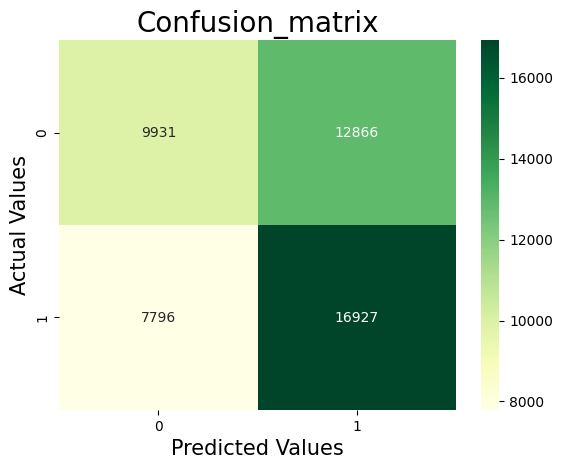

TN, FP, FN, TP: 9931 12866 7796 16927


In [12]:
lr_reg = LogisticRegression()
lr_reg.fit(X_train, y_train)
lr_pred = lr_reg.predict(X_test)
confusion_matrix(y_test, lr_pred)

print('accuracy', accuracy_score(y_test, lr_pred))
print('precision', precision_score(y_test, lr_pred))
print('recall', recall_score(y_test, lr_pred))
print('f1', f1_score(y_test, lr_pred))
      
print("\n")
print(classification_report(y_test, lr_pred))
print("\n")

## 혼동행렬
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, fmt=".0f", cmap='YlGn')
plt.xlabel('Predicted Values', size = 15)
plt.ylabel('Actual Values', size = 15)
plt.title('Confusion_matrix', size = 20)
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test, lr_pred).ravel()
print("TN, FP, FN, TP:", tn, fp, fn, tp)

### 의사결정나무 분류
: 데이터를 분석하여 데이터 간 존재하는 패턴을 예측 가능한 규칙들의 조합으로 나타내는 것으로 그 모양이 나무와 같다.

accuracy 0.9946127946127946
precision 0.994662569245077
recall 0.9949844274562148
f1 0.9948234723177094


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     22797
           1       0.99      0.99      0.99     24723

    accuracy                           0.99     47520
   macro avg       0.99      0.99      0.99     47520
weighted avg       0.99      0.99      0.99     47520





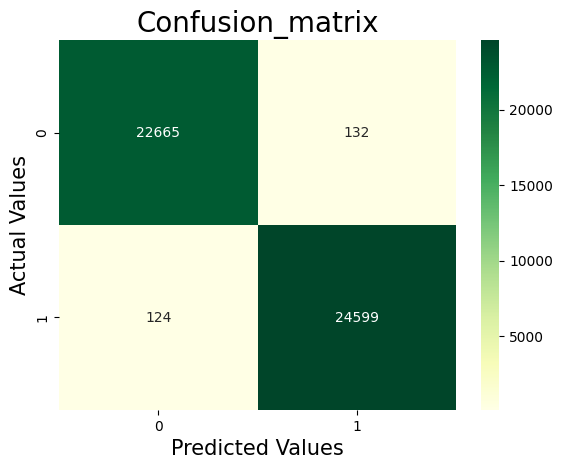

TN, FP, FN, TP: 22665 132 124 24599


In [13]:
dt_clf = DecisionTreeClassifier(criterion='gini')
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

print('accuracy', accuracy_score(y_test, dt_pred))
print('precision', precision_score(y_test, dt_pred))
print('recall', recall_score(y_test, dt_pred))
print('f1', f1_score(y_test, dt_pred))
      
print("\n")
print(classification_report(y_test, dt_pred))
print("\n")

## 혼동행렬
sns.heatmap(confusion_matrix(y_test, dt_pred), annot=True, fmt=".0f", cmap='YlGn')
plt.xlabel('Predicted Values', size = 15)
plt.ylabel('Actual Values', size = 15)
plt.title('Confusion_matrix', size = 20)
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test, dt_pred).ravel()
print("TN, FP, FN, TP:", tn, fp, fn, tp)

### 랜덤포레스트 분류
: 의사결정 나무의 경우 과적합(overfitting)이 일어날 가능성이 있어 일반화에 부적합한 상황이 나올 수 있다. 이를 보완하기 위해 앙상블 모델을 채택해 만든 것이다.

accuracy 0.9986321548821548
precision 0.9985039624777616
recall 0.9988674513610808
f1 0.9986856738449095


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22797
           1       1.00      1.00      1.00     24723

    accuracy                           1.00     47520
   macro avg       1.00      1.00      1.00     47520
weighted avg       1.00      1.00      1.00     47520





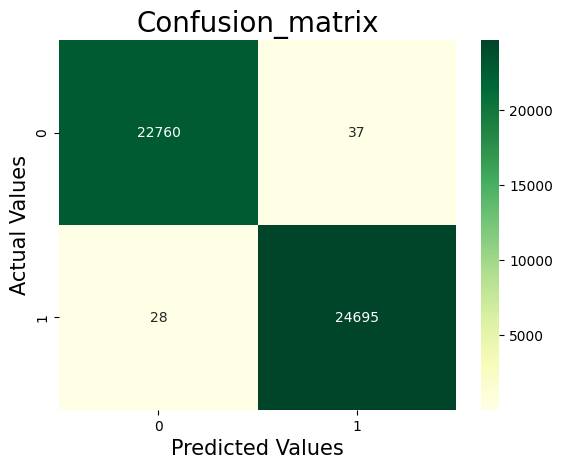

TN, FP, FN, TP: 22760 37 28 24695


In [14]:
rf_clf = RandomForestClassifier(n_estimators=100, criterion='gini')
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

print('accuracy', accuracy_score(y_test, rf_pred))
print('precision', precision_score(y_test, rf_pred))
print('recall', recall_score(y_test, rf_pred))
print('f1', f1_score(y_test, rf_pred))
      
print("\n")
print(classification_report(y_test, rf_pred))
print("\n")

## 혼동행렬
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt=".0f", cmap='YlGn')
plt.xlabel('Predicted Values', size = 15)
plt.ylabel('Actual Values', size = 15)
plt.title('Confusion_matrix', size = 20)
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test, rf_pred).ravel()
print("TN, FP, FN, TP:", tn, fp, fn, tp)

### XGBoost
: 의사결정 나무의 약점을 보완한 랜덤포레스트와 같이 앙상블 모델 기법을 채택한 모델이고, 부스팅의 원리를 이용하여 가중치를 갱신한다.

accuracy 0.7780513468013468
precision 0.7489638215665613
recall 0.8624762367026655
f1 0.8017220310943168


              precision    recall  f1-score   support

           0       0.82      0.69      0.75     22797
           1       0.75      0.86      0.80     24723

    accuracy                           0.78     47520
   macro avg       0.79      0.77      0.77     47520
weighted avg       0.78      0.78      0.78     47520





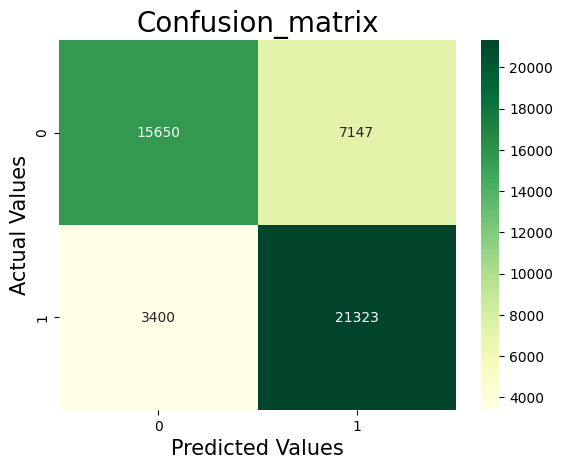

TN, FP, FN, TP: 15650 7147 3400 21323


In [15]:
xgb_clf = XGBClassifier(learning_rate=0.0001, objective='reg:squarederror')
xgb_clf.fit(np.array(X_train), np.array(y_train))
xgb_pred = xgb_clf.predict(np.array(X_test))

print('accuracy', accuracy_score(y_test, xgb_pred))
print('precision', precision_score(y_test, xgb_pred))
print('recall', recall_score(y_test, xgb_pred))
print('f1', f1_score(y_test, xgb_pred))
      
print("\n")
print(classification_report(y_test, xgb_pred))
print("\n")

## 혼동행렬
sns.heatmap(confusion_matrix(y_test, xgb_pred), annot=True, fmt=".0f", cmap='YlGn')
plt.xlabel('Predicted Values', size = 15)
plt.ylabel('Actual Values', size = 15)
plt.title('Confusion_matrix', size = 20)
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test, xgb_pred).ravel()
print("TN, FP, FN, TP:", tn, fp, fn, tp)

=> 값이 다르게 나옴 (버전 차이같음)

In [16]:
# 최적의 하이퍼 파라미터 찾기
from sklearn.model_selection import GridSearchCV

# XGBoost 모델 객체 생성
xgb_model = XGBClassifier()

# 탐색할 하이퍼파라미터 그리드 설정
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy')

# 그리드 서치 수행
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 및 최고 성능 출력
print("Best parameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

# 최적의 하이퍼파라미터를 사용하여 최종 모델 훈련
best_xgb_model = grid_search.best_estimator_
best_xgb_model.fit(X_train, y_train)

Best parameters:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}
Best accuracy:  0.9991612554112553


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

accuracy 0.9989057239057239
precision 0.998746613835766
recall 0.9991505885208106
f1 0.9989485603364607


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22797
           1       1.00      1.00      1.00     24723

    accuracy                           1.00     47520
   macro avg       1.00      1.00      1.00     47520
weighted avg       1.00      1.00      1.00     47520





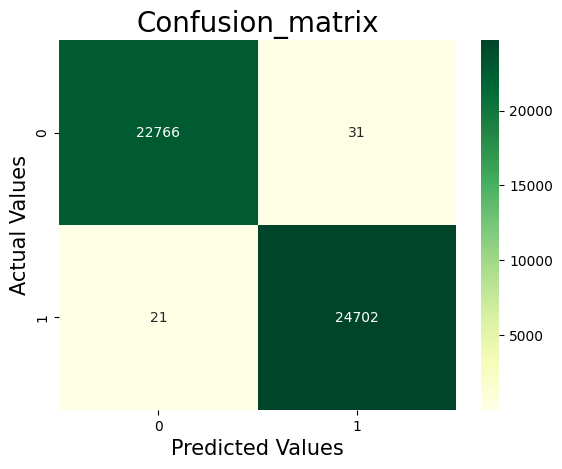

TN, FP, FN, TP: 22766 31 21 24702


In [17]:
# 최적의 파라미터 적용
xgb_clf = XGBClassifier(learning_rate=0.1, max_depth=7, n_estimators=300, objective='reg:squarederror')
xgb_clf.fit(np.array(X_train), np.array(y_train))
xgb_pred = xgb_clf.predict(np.array(X_test))

print('accuracy', accuracy_score(y_test, xgb_pred))
print('precision', precision_score(y_test, xgb_pred))
print('recall', recall_score(y_test, xgb_pred))
print('f1', f1_score(y_test, xgb_pred))
      
print("\n")
print(classification_report(y_test, xgb_pred))
print("\n")

## 혼동행렬
sns.heatmap(confusion_matrix(y_test, xgb_pred), annot=True, fmt=".0f", cmap='YlGn')
plt.xlabel('Predicted Values', size = 15)
plt.ylabel('Actual Values', size = 15)
plt.title('Confusion_matrix', size = 20)
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test, xgb_pred).ravel()
print("TN, FP, FN, TP:",tn,fp,fn,tp)

## 종속변수 = STOP(ON/OFF) 모델

In [29]:
## 데이터셋을 훈련용과 테스트용으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, Y_stop, test_size=0.3,
                                                    shuffle=True, random_state=1004)

### 로지스틱 회귀

accuracy 0.629503367003367
precision 0.6268588632424049
recall 0.33702849855299943
f1 0.4383692739568712


              precision    recall  f1-score   support

           0       0.63      0.85      0.72     27133
           1       0.63      0.34      0.44     20387

    accuracy                           0.63     47520
   macro avg       0.63      0.59      0.58     47520
weighted avg       0.63      0.63      0.60     47520





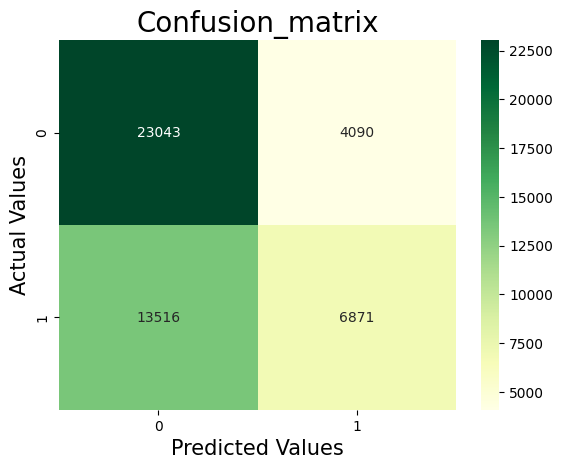

TN, FP, FN, TP: 23043 4090 13516 6871


In [30]:
lr_reg = LogisticRegression()
lr_reg.fit(X_train, y_train)
lr_pred = lr_reg.predict(X_test)
confusion_matrix(y_test, lr_pred)

print('accuracy', accuracy_score(y_test, lr_pred))
print('precision', precision_score(y_test, lr_pred))
print('recall', recall_score(y_test, lr_pred))
print('f1', f1_score(y_test, lr_pred))
      
print("\n")
print(classification_report(y_test, lr_pred))
print("\n")

## 혼동행렬
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, fmt=".0f", cmap='YlGn')
plt.xlabel('Predicted Values', size = 15)
plt.ylabel('Actual Values', size = 15)
plt.title('Confusion_matrix', size = 20)
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test, lr_pred).ravel()
print("TN, FP, FN, TP:", tn, fp, fn, tp)

### 의사결정나무 분류

accuracy 0.9896043771043771
precision 0.9879801795613992
recall 0.9877863344288027
f1 0.9878832474858965


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     27133
           1       0.99      0.99      0.99     20387

    accuracy                           0.99     47520
   macro avg       0.99      0.99      0.99     47520
weighted avg       0.99      0.99      0.99     47520





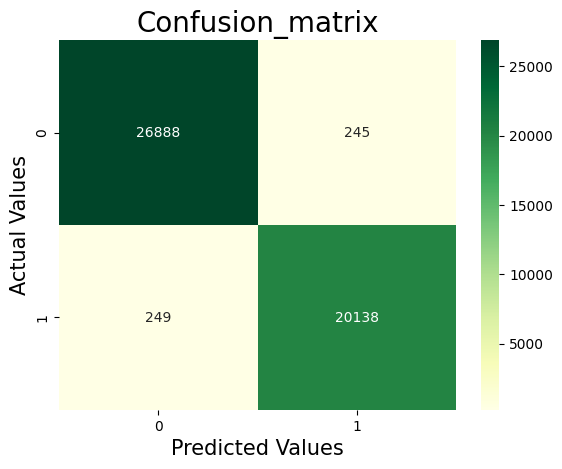

TN, FP, FN, TP: 26888 245 249 20138


In [31]:
dt_clf = DecisionTreeClassifier(criterion='gini')
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

print('accuracy', accuracy_score(y_test, dt_pred))
print('precision', precision_score(y_test, dt_pred))
print('recall', recall_score(y_test, dt_pred))
print('f1', f1_score(y_test, dt_pred))
      
print("\n")
print(classification_report(y_test, dt_pred))
print("\n")

## 혼동행렬
sns.heatmap(confusion_matrix(y_test, dt_pred), annot=True, fmt=".0f", cmap='YlGn')
plt.xlabel('Predicted Values', size = 15)
plt.ylabel('Actual Values', size = 15)
plt.title('Confusion_matrix', size = 20)
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test, dt_pred).ravel()
print("TN, FP, FN, TP:", tn, fp, fn, tp)

### 랜덤포레스트 분류

accuracy 0.9949915824915825
precision 0.993002202104233
recall 0.9953401677539608
f1 0.994169810396355


              precision    recall  f1-score   support

           0       1.00      0.99      1.00     27133
           1       0.99      1.00      0.99     20387

    accuracy                           0.99     47520
   macro avg       0.99      1.00      0.99     47520
weighted avg       0.99      0.99      0.99     47520





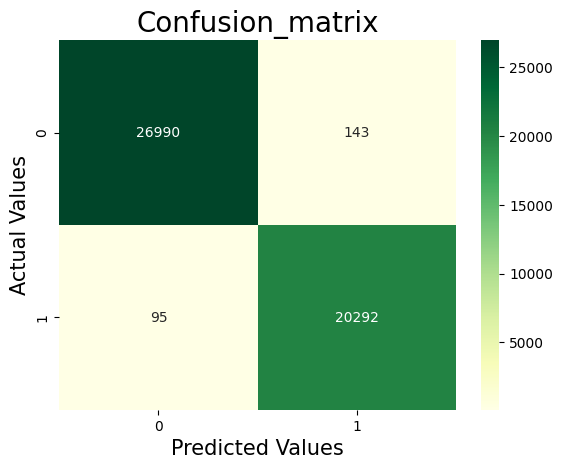

TN, FP, FN, TP: 26990 143 95 20292


In [32]:
rf_clf = RandomForestClassifier(n_estimators=100, criterion='gini')
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

print('accuracy', accuracy_score(y_test, rf_pred))
print('precision', precision_score(y_test, rf_pred))
print('recall', recall_score(y_test, rf_pred))
print('f1', f1_score(y_test, rf_pred))
      
print("\n")
print(classification_report(y_test, rf_pred))
print("\n")

## 혼동행렬
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt=".0f", cmap='YlGn')
plt.xlabel('Predicted Values', size = 15)
plt.ylabel('Actual Values', size = 15)
plt.title('Confusion_matrix', size = 20)
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test, rf_pred).ravel()
print("TN, FP, FN, TP:", tn, fp, fn, tp)

### XGBoost

accuracy 0.9943392255892256
precision 0.9932333039129155
recall 0.9935743365870408
f1 0.9934037909810941


              precision    recall  f1-score   support

           0       1.00      0.99      1.00     27133
           1       0.99      0.99      0.99     20387

    accuracy                           0.99     47520
   macro avg       0.99      0.99      0.99     47520
weighted avg       0.99      0.99      0.99     47520





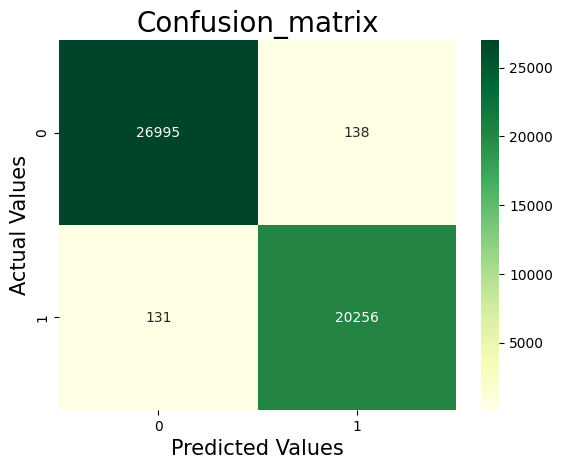

TN, FP, FN, TP: 26995 138 131 20256


In [33]:
xgb_clf = XGBClassifier(learning_rate=0.1, max_depth=7, n_estimators=300, objective='reg:squarederror')
xgb_clf.fit(np.array(X_train), np.array(y_train))
xgb_pred = xgb_clf.predict(np.array(X_test))

print('accuracy', accuracy_score(y_test, xgb_pred))
print('precision', precision_score(y_test, xgb_pred))
print('recall', recall_score(y_test, xgb_pred))
print('f1', f1_score(y_test, xgb_pred))
      
print("\n")
print(classification_report(y_test, xgb_pred))
print("\n")

## 혼동행렬
sns.heatmap(confusion_matrix(y_test, xgb_pred), annot=True, fmt=".0f", cmap='YlGn')
plt.xlabel('Predicted Values', size = 15)
plt.ylabel('Actual Values', size = 15)
plt.title('Confusion_matrix', size = 20)
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test, xgb_pred).ravel()
print("TN, FP, FN, TP:", tn, fp, fn, tp)

## 모델 저장 및 불러오기

In [34]:
## 모델 저장
joblib.dump(lr_reg,'./Logistic.pkl')
joblib.dump(dt_clf,'./DecisionTree.pkl')
joblib.dump(rf_clf,'./RandomForest.pkl')
joblib.dump(xgb_clf,'./XGBoost.pkl')

['./XGBoost.pkl']

In [35]:
## 모델 불러오기
load_model_lr = joblib.load('./Logistic.pkl')
load_model_lr

LogisticRegression()

In [36]:
## 모델 불러오기
load_model_dt = joblib.load('./DecisionTree.pkl')
load_model_dt

DecisionTreeClassifier()

In [37]:
## 모델 불러오기
load_model_rf = joblib.load('./RandomForest.pkl')
load_model_rf

RandomForestClassifier()

In [38]:
## 모델 불러오기
load_model_xgb = joblib.load('./XGBoost.pkl')
load_model_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              objective='reg:squarederror', predictor=None, ...)

# 결과